# Self-Attention

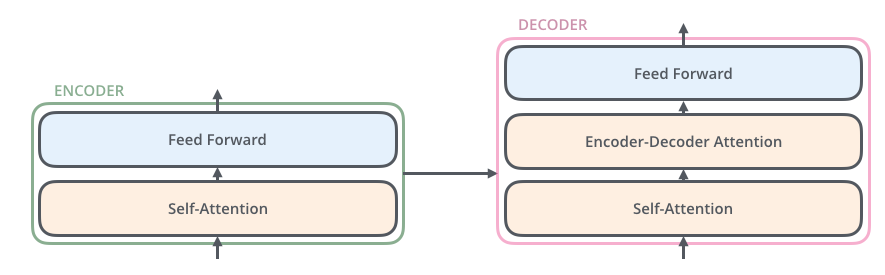

In [3]:
from IPython.display import Image
Image(filename='images/TransformerArch.png')

Механизм внимания помогает сети установить логичные связи для построения более качественных латентных векторов.

## Реализация Self-Attention

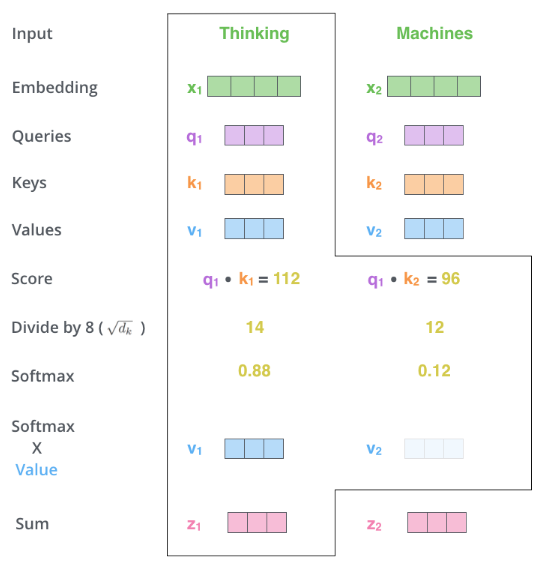

In [4]:
Image(filename='images/SA_details.png')

## Формула в матричном виде

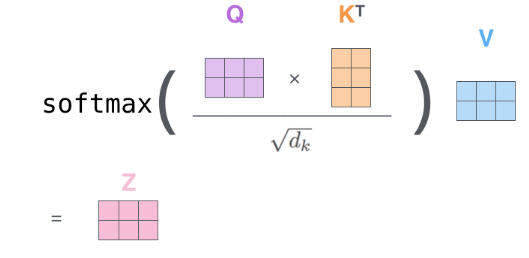

In [5]:
Image(filename='images/Formula.png')

In [6]:
import torch
import torch.nn as nn

In [18]:
class SelfAttention(nn.Module):
    
    def __init__(self, input_size, output_size=64):
        super(SelfAttention, self).__init__()
        
        self.input_size = input_size
        self.output_size = output_size
        self.coeff = torch.sqrt(torch.FloatTensor([output_size]))
        
        self.W_q = nn.Linear(input_size, output_size)
        self.W_k = nn.Linear(input_size, output_size)
        self.W_v = nn.Linear(input_size, output_size)
        
        self.softmax = nn.Softmax()
        
        return
    
    def forward(self, embeddings):
        # [batch_size, nrof_words, embd_dim]
        # [[1, 2, 3],
        #  [4, 5, 6]]
        query = self.W_q(embeddings)
        key = self.W_k(embeddings)
        value = self.W_v(embeddings)

        # dim(key) == dim(query) == dim(value) == [batch_size, nrof_words, output_size]
        k_tr = torch.transpose(key, 2, 1)
        score = torch.matmul(query, k_tr)

        score = torch.div(score, self.coeff) # score / self.coeff

        score = self.softmax(score)

        output = torch.mul(score, value)

        return output
        

In [8]:
#Toy example
test_sample = torch.FloatTensor([[[1, 2, 3], [4, 5, 6], [2, 3, 6]],
               [[7, 2, 1], [8, 5, 2], [0, 0, 0]]])

2 предложения по 3 слова

In [21]:
test_sample

tensor([[[1., 2., 3.],
         [4., 5., 6.],
         [2., 3., 6.]],

        [[7., 2., 1.],
         [8., 5., 2.],
         [0., 0., 0.]]])

In [20]:
word_embd_dim = 3
output_size = 3
attention = SelfAttention(word_embd_dim, output_size)
attention(test_sample)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[[ 2.3965e+00, -1.7601e+00, -9.0145e-01],
         [ 5.5376e+00, -4.2863e+00, -1.6911e+00],
         [ 3.9166e+00, -3.0505e+00, -1.3135e+00]],

        [[ 8.6644e-04, -3.5919e-06, -3.4632e-01],
         [ 8.0571e-03, -8.4404e-05, -8.2970e-01],
         [ 1.6428e-02,  1.9624e-04, -8.0989e-02]]], grad_fn=<MulBackward0>)